**Check In #1:**

Goal: Predicting the genre of a track

Our team has chosen the Hugging Face Spotify Tracks dataset.

The key features we have decided to study are **popularity, duration, danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo**, track genre(for training) because these would be most useful for genre prediction.





In [17]:
%pip install datasets
%pip install plotly
%pip install matplotlib
%pip install seaborn
%pip install datascience
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/Users/srishtiganu/miniconda3/envs/math156/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from datascience import *
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [5]:
df.columns


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
46383,46383,2d8BqbuiPrQhx0lyhDGXpg,The Prophet,The Hardcore Archive Part 3 (1997),I like It Loud (DJ Mix) - Extended Mix,0,396252,False,0.716,0.972,...,-5.634,0,0.0416,0.000145,0.035600,0.1250,0.0837,92.457,4,happy
95971,95971,1vQd06q85oRqunYmNTI1o7,Orquesta Aragón,Epoca De Oro De La Orquesta Aragon,Cachita,30,159600,False,0.550,0.333,...,-12.029,1,0.1620,0.589000,0.000373,0.0665,0.7040,101.668,4,salsa
17589,17589,3ZAyhJqf0ACUFsmPwE7F6P,MORIS BLAK;Pete Crane,The Irregularity Of Being,Erase Displace (feat. Pete Crane),17,250909,True,0.649,0.681,...,-5.817,1,0.0379,0.009570,0.222000,0.0528,0.1110,110.005,4,club
63447,63447,4wSehsk6FBUrrLSn6acBtA,Zeki Müren,Hayat Öpücüğü,Bir Gülü Sevdim,37,302600,False,0.323,0.410,...,-12.175,1,0.0425,0.486000,0.000037,0.3250,0.5250,95.451,4,j-rock
91544,91544,7HVcmt5g7XFV3TPxVXo5N2,The Cranberries,Halloween Kids Party 2022,Zombie,0,307440,False,0.252,0.738,...,-5.326,1,0.0446,0.014500,0.000497,0.3750,0.2560,165.187,4,rock
21065,21065,1tdRPFfXoXEz62WI3rJyfq,Sean Paul,So Me Stay,So Me Stay,51,205188,False,0.806,0.686,...,-8.247,0,0.4380,0.013000,0.000002,0.1880,0.4640,119.521,5,dancehall
30937,30937,5VGBgPVFO3e0lWz4WHYntQ,Tungevaag;Raaban;Richard Smitt,All For Love,All For Love,59,180484,False,0.689,0.901,...,-1.431,1,0.0678,0.145000,0.000010,0.4590,0.6510,125.115,4,edm
48613,48613,0uXKvyCtukUSVFfHo7YFdV,The Viper;Korsakoff,Temptation,Temptation - Original Mix,30,268279,True,0.566,0.963,...,-3.439,1,0.0903,0.132000,0.000005,0.3790,0.3800,160.068,4,hardcore
17032,17032,2Igc5kWSzeztCCZInea9Mf,Glee Cast,"Glee: The Music, The Complete Season Four",Teenage Dream - Acoustic,54,225346,False,0.493,0.362,...,-9.560,1,0.0385,0.738000,0.000000,0.0966,0.6500,129.657,4,club
7620,7620,49YDEJCvzHkNb1uoYlDGij,IIIrd Tyme Out,IIIrd Tyme Out,Erase The Miles,22,292560,False,0.536,0.157,...,-18.520,1,0.0296,0.824000,0.000097,0.1080,0.1930,96.635,4,bluegrass


The one missing row might be because the name and artists are in Korean since it is a k-pop genre song.



In [7]:
missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)


Number of missing data rows: 1
Missing data rows:
       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [8]:
# list of number of tracks (rows) in each unique track_genre
for genre in df['track_genre'].unique():
  print(f"{genre}: {len(df[df['track_genre'] == genre])}")

acoustic: 1000
afrobeat: 1000
alt-rock: 1000
alternative: 1000
ambient: 1000
anime: 1000
black-metal: 1000
bluegrass: 1000
blues: 1000
brazil: 1000
breakbeat: 1000
british: 1000
cantopop: 1000
chicago-house: 1000
children: 1000
chill: 1000
classical: 1000
club: 1000
comedy: 1000
country: 1000
dance: 1000
dancehall: 1000
death-metal: 1000
deep-house: 1000
detroit-techno: 1000
disco: 1000
disney: 1000
drum-and-bass: 1000
dub: 1000
dubstep: 1000
edm: 1000
electro: 1000
electronic: 1000
emo: 1000
folk: 1000
forro: 1000
french: 1000
funk: 1000
garage: 1000
german: 1000
gospel: 1000
goth: 1000
grindcore: 1000
groove: 1000
grunge: 1000
guitar: 1000
happy: 1000
hard-rock: 1000
hardcore: 1000
hardstyle: 1000
heavy-metal: 1000
hip-hop: 1000
honky-tonk: 1000
house: 1000
idm: 1000
indian: 1000
indie-pop: 1000
indie: 1000
industrial: 1000
iranian: 1000
j-dance: 1000
j-idol: 1000
j-pop: 1000
j-rock: 1000
jazz: 1000
k-pop: 1000
kids: 1000
latin: 1000
latino: 1000
malay: 1000
mandopop: 1000
metal: 100

# **Data Cleaning:**

There is only 1 row missing some values, so we are removing this row.

In [9]:
df = df.dropna()
missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)


Number of missing data rows: 0
Missing data rows:
Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


# **Exploratory Data Analysis:**

Average popularity per Genre

In [10]:
avg_popularity_per_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
avg_popularity_per_genre.columns = ["Genre", "Avg Popularity"]
avg_popularity_per_genre = avg_popularity_per_genre.sort_values(by='Avg Popularity', ascending=False)

avg_popularity_per_genre

,Genre,Avg Popularity
81,pop-film,59.283000
65,k-pop,56.952953
15,chill,53.651000
94,sad,52.379000
44,grunge,49.594000
...,...,...
13,chicago-house,12.339000
24,detroit-techno,11.174000
67,latin,8.297000
93,romance,3.245000


Average Danceability Per Genre Table:

In [11]:
avg_dance_per_genre = df.groupby('track_genre')['danceability'].mean().reset_index()
avg_dance_per_genre.columns = ["Genre", "Avg Danceability"]
avg_dance_per_genre_sorted = avg_dance_per_genre.sort_values(by='Avg Danceability', ascending=True)
pd.set_option('display.max_rows', None)
print(avg_dance_per_genre_sorted)


                 Genre  Avg Danceability
101              sleep          0.167923
42           grindcore          0.271854
6          black-metal          0.296411
59             iranian          0.300686
76               opera          0.313563
75             new-age          0.348455
4              ambient          0.367867
22         death-metal          0.368411
16           classical          0.381923
113        world-music          0.414572
72           metalcore          0.423800
50         heavy-metal          0.428500
93             romance          0.432133
79               piano          0.455098
44              grunge          0.457062
26              disney          0.462874
98          show-tunes          0.463738
71               metal          0.464288
40              gospel          0.473298
82           power-pop          0.473410
41                goth          0.478875
47           hard-rock          0.482250
38              garage          0.484264
85              

Average Energy Value Per Genre Table:

In [12]:
avg_energy_per_genre = df.groupby('track_genre')['energy'].mean().reset_index()
avg_energy_per_genre.columns = ['Genre', 'Average Energy']
avg_energy_per_genre_sorted = avg_energy_per_genre.sort_values(by='Average Energy', ascending=True)
pd.set_option('display.max_rows', None)
print(avg_energy_per_genre_sorted)

                 Genre  Average Energy
16           classical        0.189827
75             new-age        0.214501
4              ambient        0.237162
93             romance        0.294304
26              disney        0.302519
76               opera        0.317054
79               piano        0.320103
45              guitar        0.324999
101              sleep        0.342072
64                jazz        0.352954
52          honky-tonk        0.366957
108              tango        0.372828
98          show-tunes        0.398742
105              study        0.410658
15               chill        0.426723
99   singer-songwriter        0.434188
102         songwriter        0.434188
0             acoustic        0.435368
12            cantopop        0.461696
94                 sad        0.462470
14            children        0.494645
70            mandopop        0.498434
11             british        0.507127
91         rock-n-roll        0.526615
7            bluegrass   

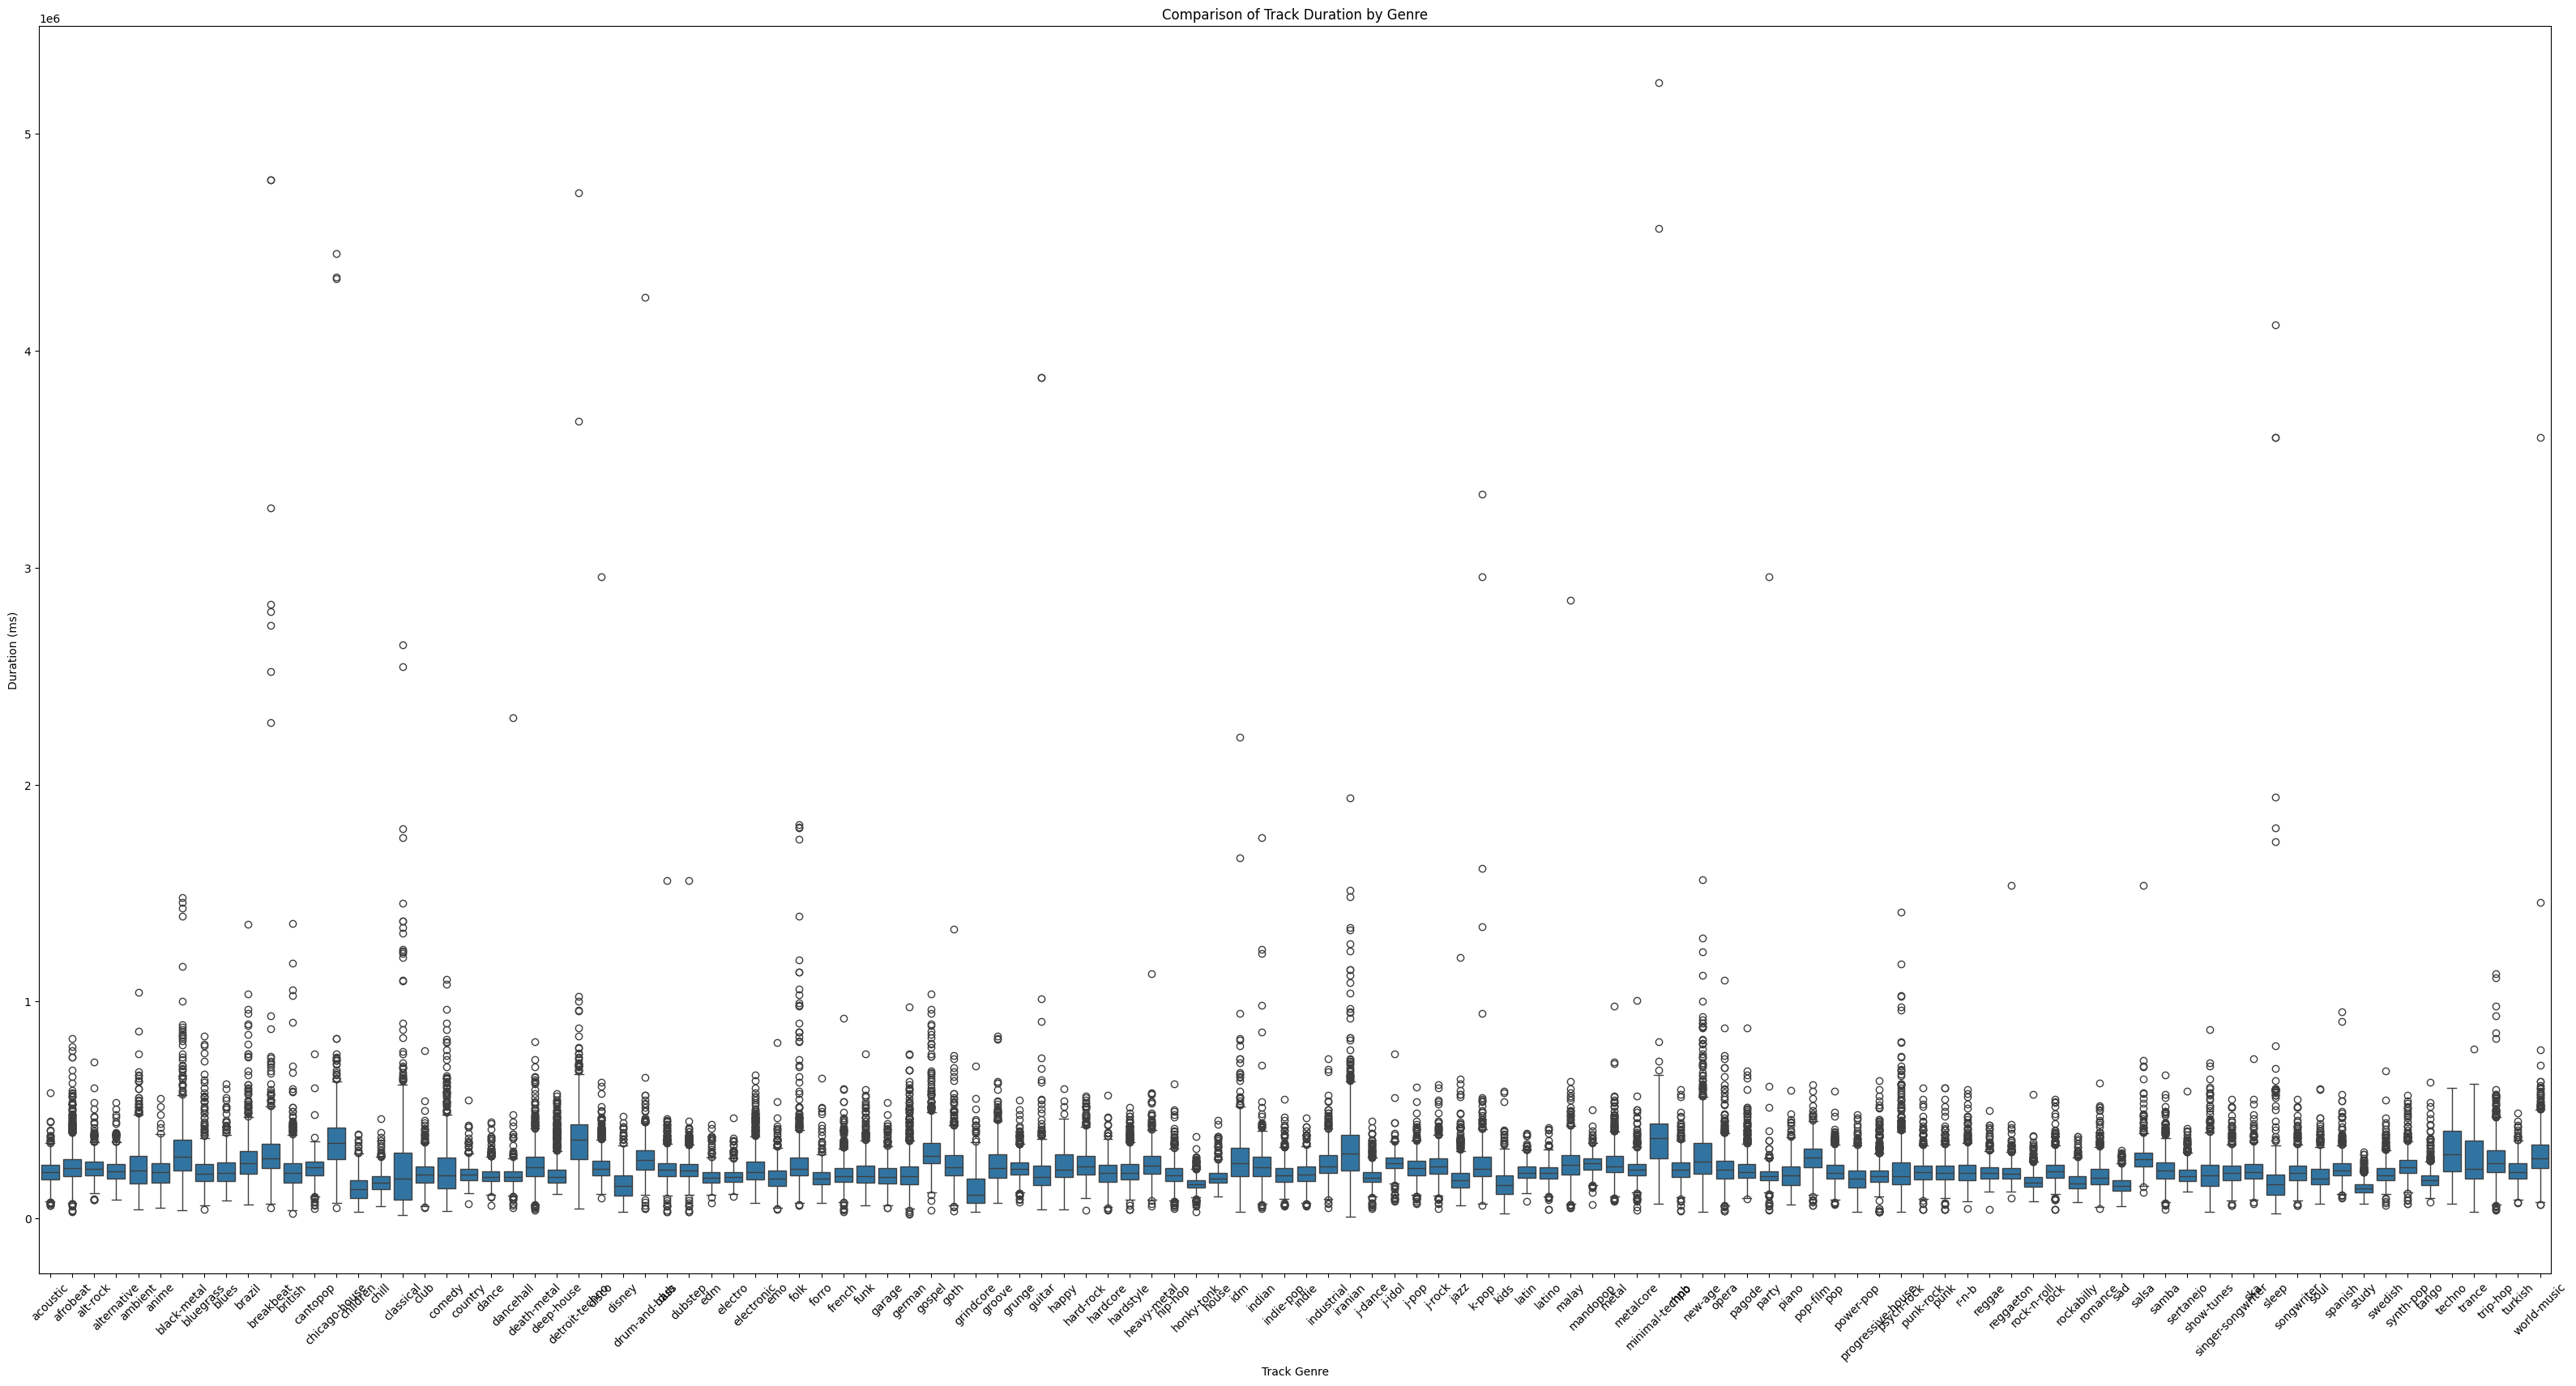

In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(40, 20))

# Create a box plot
sns.boxplot(x='track_genre', y='duration_ms', data = df)

# Set labels and title
plt.title('Comparison of Track Duration by Genre')
plt.xlabel('Track Genre')
plt.ylabel('Duration (ms)')

# Rotate x labels for better readability if there are many genres
plt.xticks(rotation=45)

# Show the plot
plt.show()

Week 3

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

non_numeric_cols = df.select_dtypes(include=['object']).columns
# print(non_numeric_cols)


X = df.drop(columns=['popularity', 'track_id', 'track_name','album_name', 'artists', 'track_genre'])
y = df['popularity']


# for lasso:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
# Split the data: 70% training, 15% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1) # try changing alpha to make it better!
lasso.fit(X_train, y_train)

y_val_pred = lasso.predict(X_val)
#MSE
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")

lasso_coefficients = lasso.coef_
feature_names = X.columns
# feature_names = df.drop(columns=['popularity', 'track_id', 'track_name','album_name', 'artists', 'track_genre']).columns
important_features = [(feature, coef) for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
important_features = sorted(important_features, key=lambda x: abs(x[1]), reverse=True)

print("Important Features:")
for feature, coef in important_features:
    print(f"{feature}: {coef}")

Validation MSE: 367.1741530246872
Important Features:
valence: -1.261445823190999
danceability: 0.7244981000004923
explicit: 0.6654460044078744
instrumentalness: -0.5918909729178959
energy: -0.5804399813456639
speechiness: -0.5180501370316078
mode: -0.37198188034483726
time_signature: 0.2268056406819765
loudness: 0.21593738496504383
acousticness: -0.16538160117910838
liveness: -0.14362978240570318
tempo: 0.11187819388584941
key: -0.018967799609413114
Unnamed: 0: 0.006898023391795211


 Based on these lasso regression results to find the most important predictors of popularity, we have decided to use Danceability as our predictors of popularity so we can apply linear. 
 
 We are a bit confused about why valence is a big negative predictor of popularity. 

In [ ]:
#Linear Regression Model 

from sklearn.linear_model import LinearRegression

ls_fit = LinearRegression()
ls_fit.fit(X_train,y_train)
print("Intercept: ", ls_fit.intercept_)
print("Coefficients: ", ls_fit.coef_[0])

In [ ]:
# Linear Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training Data
pred_train_df = pd.DataFrame( # dataframe to compare true value to predicted value
    {'true': y_train,
     'ls_pred': ls_fit.predict(np.array(X_train).reshape(-1, 1))})

# compute the rMSE, MAE, MAD, correlation and R2 of true value with predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

# Validation Data
pred_val_df = pd.DataFrame( # dataframe to compare true value to predicted value
    {'true': y_val,
     'ls_pred': ls_fit.predict(np.array(X_val).reshape(-1, 1))})

# compute the rMSE, MAE, MAD, correlation and R2 of true value with predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_val_df['true'], pred_val_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_val_df['true'], pred_val_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_val_df['true'] - pred_val_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_val_df['true'], pred_val_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_val_df['true'], pred_val_df['ls_pred']))

Is the model overfitting or underfitting?


In [ ]:
# Regularization

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alphas = np.logspace(-1, 6, 100)
kf = KFold(n_splits=10, shuffle=True, random_state=42)


ridge_cv_scores = []
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge_cv = cross_validate(estimator=ridge,
                              X=X_scaled,
                              y=y,
                              cv=kf,
                              scoring='neg_root_mean_squared_error')
  ridge_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(ridge_cv['test_score'])})

ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)
px.line(ridge_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Ridge')  

#find best alpha
ridge_alpha_min = ridge_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]

mse_se_ridge = ridge_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_ridge = ridge_cv_scores_df['test_mse'].min()

ridge_alpha_1se = ridge_cv_scores_df[(ridge_cv_scores_df['test_mse'] <= mse_min_ridge + mse_se_ridge) &
                                     (ridge_cv_scores_df['test_mse'] >= mse_min_ridge - mse_se_ridge)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]

print('Ridge (min): ', ridge_alpha_min)
print('Ridge (1SE): ', ridge_alpha_1se)

ridge_min_fit = Ridge(alpha=ridge_alpha_min).fit(X=X_scaled, y=y)
ridge_1se_fit = Ridge(alpha=ridge_alpha_1se).fit(X=X_scaled, y=y)



Ridge (min):  403.70172585965537
Ridge (1SE):  23644.894126454074
